In [45]:
!pip install levenshtein

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.5/161.5 KB 1.7 MB/s eta 0:00:001.5 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 9.9 MB/s eta 0:00:000m eta 0:00:010:00:01


In [239]:
import pymorphy2
import re
from nltk.corpus import stopwords
import Levenshtein
from pyvis.network import Network
from IPython.display import HTML
from PIL import Image
import matplotlib.pyplot as plt

In [1]:
# Импорт библиотеки transformers и загрузка pipeline для задачи NER
from transformers import pipeline

# Инициализация NER пайплайна с моделью RuBERT
# ner_pipeline = pipeline('ner', model='DeepPavlov/rubert-base-cased-ner', aggregation_strategy="simple")
ner_pipeline = pipeline('ner', model='SlavicNLP/slavicner-ner-cross-topic-large', aggregation_strategy="simple")


# Текст для извлечения сущностей
text = "Иван Петров работает в компании Яндекс в Москве."

# Извлечение сущностей
ner_results = ner_pipeline(text)

# Вывод результатов
print(ner_results)

config.json:   0%|          | 0.00/1.14k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

Device set to use cuda:0


[{'entity_group': 'PER', 'score': 0.9787045, 'word': 'Иван Петров', 'start': 0, 'end': 11}, {'entity_group': 'ORG', 'score': 0.95901304, 'word': '', 'start': 32, 'end': 33}, {'entity_group': 'ORG', 'score': 0.97429854, 'word': 'Яндекс', 'start': 32, 'end': 38}, {'entity_group': 'LOC', 'score': 0.98756105, 'word': 'Москве', 'start': 41, 'end': 47}]


In [2]:
from transformers import pipeline

relation_extractor = pipeline('zero-shot-classification', model='MoritzLaurer/mDeBERTa-v3-base-mnli-xnli')

text = "Иван Иванов работает в компании Яндекс, расположенной в Москве."
candidate_labels = ["работает в", "родился в", "учится в"]

entities_pairs = [("Иван Иванов", "Яндекс"), ("Яндекс", "Москва")]

for entity1, entity2 in entities_pairs:
    results = relation_extractor(text, candidate_labels)
    best_label = results['labels'][0]
    confidence = results['scores'][0]
    print(f"{entity1} -> {best_label} -> {entity2}, уверенность: {confidence:.2f}")

config.json:   0%|          | 0.00/1.07k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/558M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.26k [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/4.31M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/16.3M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/23.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/286 [00:00<?, ?B/s]

Device set to use cuda:0


Иван Иванов -> работает в -> Яндекс, уверенность: 0.88
Яндекс -> работает в -> Москва, уверенность: 0.88


In [3]:
# Функция извлечения пар сущностей из текста
from transformers import pipeline

# NER-пайплайн для извлечения сущностей
# ner_pipeline = pipeline('ner', model='DeepPavlov/rubert-base-cased-ner', aggregation_strategy="simple")
ner_pipeline = pipeline('ner', model='SlavicNLP/slavicner-ner-cross-topic-large', aggregation_strategy="simple")

text = "Иван Петров работает в компании Яндекс в Москве."
ner_results = ner_pipeline(text)

# Автоматическое извлечение пар сущностей (например, PERSON-ORG)
def extract_entity_pairs(ner_results):
    entities = [(res['entity_group'], res['word']) for res in ner_results]
    pairs = []
    for i, (type1, ent1) in enumerate(entities):
        for type2, ent2 in entities[i+1:]:
            if type1 != type2:
                pairs.append((ent1, ent2))
    return pairs

entity_pairs = extract_entity_pairs(ner_results)
print(entity_pairs)


Device set to use cuda:0


[('Иван Петров', ''), ('Иван Петров', 'Яндекс'), ('Иван Петров', 'Москве'), ('', 'Москве'), ('Яндекс', 'Москве')]


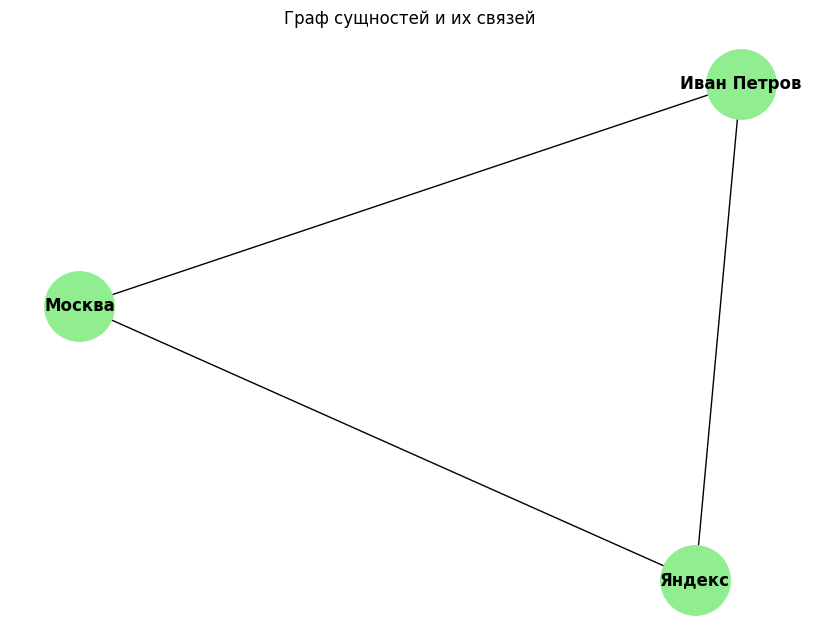

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Создание пустого графа
G = nx.Graph()

# Добавление сущностей и связей между ними
entity_pairs = [("Иван Петров", "Яндекс"), ("Иван Петров", "Москва"), ("Яндекс", "Москва")]

for ent1, ent2 in entity_pairs:
    G.add_edge(ent1, ent2)

# Визуализация графа
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2500, node_color='lightgreen', font_size=12, font_weight='bold')
plt.title('Граф сущностей и их связей')
plt.show()

### Задания для самостоятельной работы:
    1. Найдите текст объемом 100-200 слов, извлеките сущности и визуализируйте граф связей.
    2. Используя результаты извлечения сущностей, составьте пары для анализа отношений и выделите наиболее частые.
    3. Примените альтернативную модель (например, cointegrated/rubert-tiny2), сравните её результаты с RuBERT.
    4. Реализуйте автоматизированное извлечение связей из большого текста и визуализируйте в виде графа.
    5. Проведите анализ связей на новостной статье и опишите, какие сущности и связи преобладают.
    6. Составьте краткий отчет о применении NER и извлечения отношений в реальных задачах бизнеса.

In [237]:
story = ''' Необъятная размахом Россия пленяет красотой просторов, щедростью души, уважением к своей истории, культуре, бережным отношением к несметным богатствам, дарованным природой. Не счесть в огромной стране заповедных уголков, городов и деревень, памятников природных и рукотворных. Самые известные достопримечательности России известны во всем мире. Знакомиться с ними – интереснейшее занятие, к которому мы вас приглашаем. Пока только в этой статье, но, надеемся, виртуальное знакомство превратится в реальные путешествия. Компания «ВодоходЪ» всегда к вашим услугам!

В городах России сосредоточены главные исторические достопримечательности страны, объекты культуры, научные, промышленные центры. В них проживает основная часть населения Российской Федерации. Самыми известными и посещаемыми городами являются столицы – Москва и Санкт-Петербург.
Достопримечательности Москвы

В древнем русском городе, основанном Юрием Долгоруким в 1147 году, сохранилось множество исторических памятников, архитектурных шедевров, старинных особняков. Современная Москва не менее прекрасна. Поднялись к небу башни делового центра «Москва-Сити», украсили город великолепные строения комфортных жилых комплексов, появились новые, удобные виды транспорта, зазеленели парки и скверы. Сердцем Москвы, да и всей России остается главная площадь страны.
Красная площадь

С ее главными достопримечательностями каждый россиянин знаком хотя бы по картинкам. Для всех близки и узнаваемы:

    Московский Кремль – монументальная крепость, возведенная в XV веке во времена правления Ивана III. Это самая крупная сохранившаяся и действующая крепость в мире. Длина ее стен составляет 2 км 235 м.
    Собор Василия Блаженного – красивейший храм построен в честь победы Руси над Казанским ханством.
    Памятник Минину и Пожарскому – установлен перед Собором Василия Блаженного в ознаменование изгнания из столицы польских интервентов в 1612 году.
    Некрополь у Кремлевской стены – хранит вечный покой выдающихся полководцев, политических деятелей, известных и уважаемых людей России.
    Мавзолей В.И.Ленина – в гранитном сооружении находится прах вождя мирового пролетариата, интерес к нему не ослабевают, в очереди к Мавзолею выстраиваются тысячи людей.
    Исторический музей – расположен на противоположной от Собора Василия Блаженного стороне обширного пространства, покрытого брусчаткой. Красивое кирпичное сооружение является украшением главной площади России.
    Здание ГУМа – государственный универсальный магазин прекрасно вписался в ансамбль Красной площади, он протянулся напротив Кремлевской стены.

Это самые важные места центра столицы. Знаковыми и активно посещаемыми являются Большой Театр, Третьяковская галерея, ВДНХ. Прокатиться на поезде знаменитого московского метро, погулять по паркам и проспектам, побывать в музеях, почувствовать ритм жизни огромного мегаполиса необычайно интересно.

Отдохнуть в покое и тишине приятно в живописных пригородах Москвы. Наиболее популярными из них можно назвать Царицыно – бывшую царскую резиденцию династии Романовых, усадьбу князей Голицыных Дубровицы недалеко от подмосковного Подольска, восхитительный архитектурный ансамбль «Архангельское». '''

len(story.split(' '))

413

In [39]:
stop_list = stopwords.words("russian")
def clear_text(text):
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'URL', text) # Удаление ссылок
    text = re.sub('"[\S]+"', '', text) # Удаление названий. Пример: "ООО ..."
    # text = text.lower().replace("ё", "е")

    for i in list('.?!()') + ['...']:
        text = text.replace(i, ' ') # В конце строки часто не ставят пробелов
        # из-за этого после обработки два слова склеиваются и перестают нести смысловую нагрузку для сети
    
    # symbols = re.findall("[а-я\s]", text) # Оставляем только буквы
    # text = ''.join(symbols)
    text = re.sub(' +', ' ', text) # Оставляем между словами 1 пробел
    return text.strip()

morph = pymorphy2.MorphAnalyzer(lang='ru')

def stemming(text):
    text = text.split()
    new_text = []

    for i in text:
        tmp = morph.parse(i)[0]
        if tmp.normal_form in stop_list:
            continue
        if not 'UNKN' in tmp.tag: # Если слово написано с ошибкой или несуществующее слово
            word = tmp.normal_form
            if  i[0].isupper():
                word = word.capitalize()
            new_text.append(word)
    
    return ' '.join(new_text)

def preprocess_text(text):
    text = clear_text(text)
    text = stemming(text)
    return text

In [40]:
text = preprocess_text(story)
text

'Необъятный размах Россия пленять красота щедрость уважение свой бережный отношение несметный даровать природа счесть огромный страна заповедный город памятник природный рукотворный Самый известный достопримечательность Россия известный весь мир Знакомиться – интересный который приглашать Пока виртуальный знакомство превратиться реальный путешествие Компания ваш услуга город Россия сосредоточить главный исторический достопримечательность объект промышленный центр проживать основный часть население Российский Федерация Самый известный посещать город являться столица – Москва Санкт-петербург Достопримечательность Москва древний русский основать Юрий Долгорукий 1147 сохраниться множество исторический архитектурный старинный особняк Современный Москва менее прекрасный Подняться небо башня деловой центр украсить город великолепный строение комфортный жилой появиться удобный вид зазеленеть парка сквер Сердце весь Россия оставаться главный площадь страна Красный площадь главный достопримечате

In [81]:
ner_results = ner_pipeline(story)
entity_pairs = extract_entity_pairs(ner_results)
print(entity_pairs)

[('Россия', '«ВодоходЪ»'), ('Россия', 'Юрием Долгоруким'), ('Россия', 'россиян'), ('Россия', 'Ивана III'), ('Россия', 'Минину'), ('Россия', 'Пожарскому'), ('России', '«ВодоходЪ»'), ('России', 'Юрием Долгоруким'), ('России', 'россиян'), ('России', 'Ивана III'), ('России', 'Минину'), ('России', 'Пожарскому'), ('«ВодоходЪ»', 'России'), ('«ВодоходЪ»', 'Российской Федерации'), ('«ВодоходЪ»', 'Москва'), ('«ВодоходЪ»', 'Санкт-Петербург'), ('«ВодоходЪ»', 'Москвы'), ('«ВодоходЪ»', 'Юрием Долгоруким'), ('«ВодоходЪ»', 'Москва'), ('«ВодоходЪ»', 'Москва-Сити'), ('«ВодоходЪ»', 'Москвы'), ('«ВодоходЪ»', 'России'), ('«ВодоходЪ»', 'Красная площадь'), ('«ВодоходЪ»', 'россиян'), ('«ВодоходЪ»', 'Московский Кремль'), ('«ВодоходЪ»', 'Ивана III'), ('«ВодоходЪ»', 'Собор Василия Блажен'), ('«ВодоходЪ»', 'Руси'), ('«ВодоходЪ»', 'Казанским ханством'), ('«ВодоходЪ»', 'Минину'), ('«ВодоходЪ»', 'Пожарскому'), ('«ВодоходЪ»', 'Собором Василия Блажен'), ('«ВодоходЪ»', 'Кремлевской стены'), ('«ВодоходЪ»', 'России'), ('

In [82]:
all_ner = []
for i in entity_pairs:
  all_ner.extend(i)
all_ner = set(sorted(all_ner))
all_ner

{'«ВодоходЪ»',
 'Ивана III',
 'Казанским ханством',
 'Красная площадь',
 'Кремлевской стены',
 'Ма',
 'Минину',
 'Москва',
 'Москва-Сити',
 'Москвы',
 'Московский Кремль',
 'Пожарскому',
 'России',
 'Российской Федерации',
 'Россия',
 'Руси',
 'Санкт-Петербург',
 'Собор Василия Блажен',
 'Собором Василия Блажен',
 'Юрием Долгоруким',
 'россиян'}

In [48]:
Levenshtein.distance('Москва', 'Минину')

5

In [54]:
# def word_union(unique_words, distance = 3):
#     words = {}

#     for i, word in enumerate(unique_words):
#         words[word] = []
#         for j in unique_words[i+1:]:
#             if Levenshtein.distance(word, j) < distance:
#                 words[word].append(j)
#     return words

In [69]:
# from queue import Queue

# def word_union(unique_words, distance = 3):
#     words = {}
#     # print(unique_words.pop('Ма'))
#     for i in range(len(unique_words)):
#         word = unique_words[i]
#         words[word] = []
        
#         for j, word2 in enumerate(unique_words[i+1:]):
#             if Levenshtein.distance(word, word2) < distance:
#                 words[word].append(word2)
#                 unique_words.remove(word2)
#     return words

In [71]:
def word_union(unique_words, distance = 3):
    words = {}

    while len(unique_words) != 0:
        word = unique_words[0]
        unique_words.remove(word)
        words[word] = []

        for j, word2 in enumerate(unique_words):
            if Levenshtein.distance(word, word2) < distance:
                words[word].append(word2)
                unique_words.remove(word2)
    return words

In [83]:
similar_words = word_union(list(all_ner), distance = 4)
similar_words

{'Собором Василия Блажен': ['Собор Василия Блажен'],
 'Ивана III': [],
 'России': ['россиян', 'Руси', 'Россия'],
 'Ма': [],
 '«ВодоходЪ»': [],
 'Санкт-Петербург': [],
 'Юрием Долгоруким': [],
 'Московский Кремль': [],
 'Москвы': ['Москва'],
 'Российской Федерации': [],
 'Красная площадь': [],
 'Минину': [],
 'Пожарскому': [],
 'Казанским ханством': [],
 'Кремлевской стены': [],
 'Москва-Сити': []}

In [84]:
def replace_similar_words(text, similar_words):
    for key, values in similar_words.items():
        for i in values:
            text.replace(i, key)
    return text

In [85]:
new_text = replace_similar_words(text, similar_words)
new_text

'Необъятный размах Россия пленять красота щедрость уважение свой бережный отношение несметный даровать природа счесть огромный страна заповедный город памятник природный рукотворный Самый известный достопримечательность Россия известный весь мир Знакомиться – интересный который приглашать Пока виртуальный знакомство превратиться реальный путешествие Компания ваш услуга город Россия сосредоточить главный исторический достопримечательность объект промышленный центр проживать основный часть население Российский Федерация Самый известный посещать город являться столица – Москва Санкт-петербург Достопримечательность Москва древний русский основать Юрий Долгорукий 1147 сохраниться множество исторический архитектурный старинный особняк Современный Москва менее прекрасный Подняться небо башня деловой центр украсить город великолепный строение комфортный жилой появиться удобный вид зазеленеть парка сквер Сердце весь Россия оставаться главный площадь страна Красный площадь главный достопримечате

In [87]:
def replace_word(similar_words, word):
    if word in similar_words.keys():
        return word
    else:
        for key, values in similar_words.items():
            if word in  values:
                return key
        else:
            return 'UNKNOWN'

def replace_entity_pairs(entity_pairs, similar_words):
    pairs = []

    for i in entity_pairs:
        x = replace_word(similar_words, i[0])
        y = replace_word(similar_words, i[1])
        pairs.append((x, y))
    return pairs

In [175]:
pairs = replace_entity_pairs(entity_pairs, similar_words)
pairs

[('России', '«ВодоходЪ»'),
 ('России', 'Юрием Долгоруким'),
 ('России', 'России'),
 ('России', 'Ивана III'),
 ('России', 'Минину'),
 ('России', 'Пожарскому'),
 ('России', '«ВодоходЪ»'),
 ('России', 'Юрием Долгоруким'),
 ('России', 'России'),
 ('России', 'Ивана III'),
 ('России', 'Минину'),
 ('России', 'Пожарскому'),
 ('«ВодоходЪ»', 'России'),
 ('«ВодоходЪ»', 'Российской Федерации'),
 ('«ВодоходЪ»', 'Москвы'),
 ('«ВодоходЪ»', 'Санкт-Петербург'),
 ('«ВодоходЪ»', 'Москвы'),
 ('«ВодоходЪ»', 'Юрием Долгоруким'),
 ('«ВодоходЪ»', 'Москвы'),
 ('«ВодоходЪ»', 'Москва-Сити'),
 ('«ВодоходЪ»', 'Москвы'),
 ('«ВодоходЪ»', 'России'),
 ('«ВодоходЪ»', 'Красная площадь'),
 ('«ВодоходЪ»', 'России'),
 ('«ВодоходЪ»', 'Московский Кремль'),
 ('«ВодоходЪ»', 'Ивана III'),
 ('«ВодоходЪ»', 'Собором Василия Блажен'),
 ('«ВодоходЪ»', 'России'),
 ('«ВодоходЪ»', 'Казанским ханством'),
 ('«ВодоходЪ»', 'Минину'),
 ('«ВодоходЪ»', 'Пожарскому'),
 ('«ВодоходЪ»', 'Собором Василия Блажен'),
 ('«ВодоходЪ»', 'Кремлевской стен

In [91]:
def draw_graph(entity_pairs):
    G = nx.Graph()

    for ent1, ent2 in entity_pairs:
        G.add_edge(ent1, ent2)
    
    # Визуализация графа
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=2500, node_color='lightgreen', font_size=12, font_weight='bold')
    plt.title('Граф сущностей и их связей')
    plt.show()

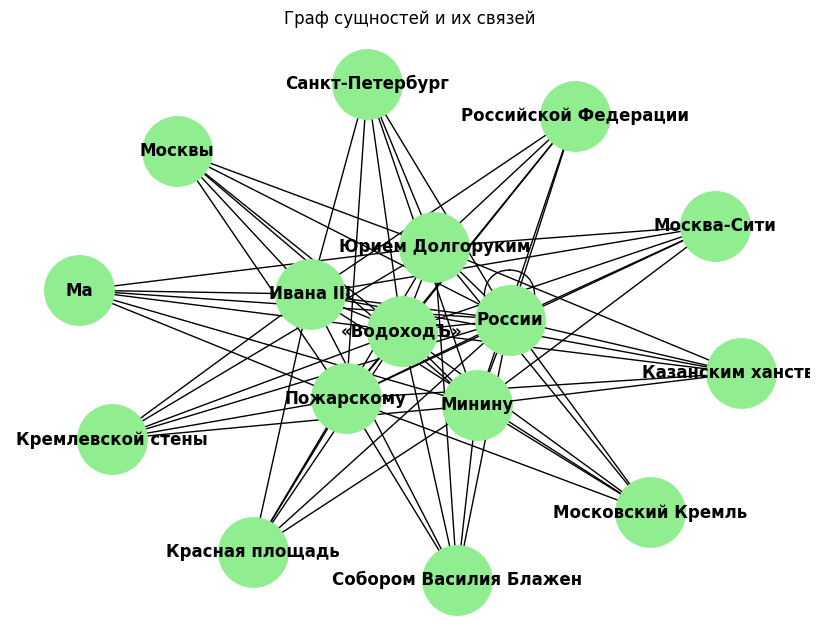

In [92]:
draw_graph(pairs)

In [218]:
def draw_graph2(entity_pairs, unique_words, node_distance=150, spring_length=50):
    net = Network(notebook=True)
    unique_words = {word:i for i, word in enumerate(unique_words)}
    point_list = list(range(len(unique_words)))
    
    net.add_nodes(list(unique_words.values()), label = list(unique_words.keys()))

    edges = []
    for i in entity_pairs:
        x = unique_words[i[0]]
        y = unique_words[i[1]]
        edges.append((x, y))

    net.add_edges(edges)
    net.repulsion(node_distance=node_distance, spring_length=spring_length)
    net.show("ner_graph.html")

In [136]:
draw_graph2(pairs, set(similar_words.keys()))
HTML(filename="ner_graph.html")

ner_graph.html


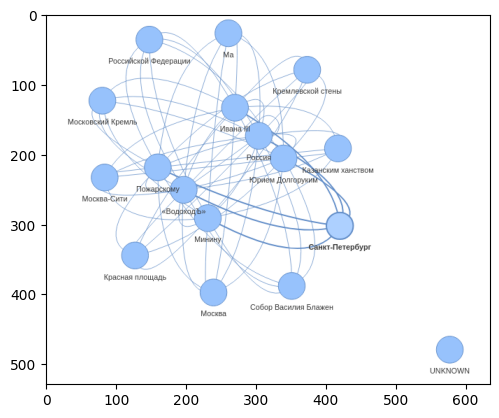

In [243]:
plt.imshow(Image.open('small_text.png'))

In [172]:
def most_frequent_pairs(entity_pairs):
    top = {}

    while len(entity_pairs) != 0:
        words = entity_pairs[0]
        entity_pairs.remove(words)
        key = '_'.join(words)
        top[key] = 1
        
        for i in entity_pairs:
            if words[0] in i and words[1] in i:
                top[key] += 1
                entity_pairs.remove(i)
    return top

In [186]:
freq_words = most_frequent_pairs(pairs)

In [182]:
freq_words = [(i[0], i[1]) for i in freq_words.items()]

In [185]:
sorted(freq_words, key=lambda x: x[1], reverse=True)

[('России_«ВодоходЪ»', 7),
 ('России_Юрием Долгоруким', 6),
 ('«ВодоходЪ»_Москвы', 4),
 ('Москвы_Юрием Долгоруким', 4),
 ('Москвы_Ивана III', 4),
 ('Москвы_Минину', 4),
 ('Москвы_Пожарскому', 4),
 ('России_Пожарскому', 3),
 ('России_России', 2),
 ('«ВодоходЪ»_Собором Василия Блажен', 2),
 ('России_Ивана III', 2),
 ('Юрием Долгоруким_Собором Василия Блажен', 2),
 ('России_Минину', 2),
 ('Ивана III_Собором Василия Блажен', 2),
 ('Собором Василия Блажен_Минину', 2),
 ('Собором Василия Блажен_Пожарскому', 2),
 ('«ВодоходЪ»_Российской Федерации', 1),
 ('«ВодоходЪ»_Санкт-Петербург', 1),
 ('«ВодоходЪ»_Юрием Долгоруким', 1),
 ('«ВодоходЪ»_Москва-Сити', 1),
 ('«ВодоходЪ»_Красная площадь', 1),
 ('«ВодоходЪ»_Московский Кремль', 1),
 ('«ВодоходЪ»_Ивана III', 1),
 ('«ВодоходЪ»_Казанским ханством', 1),
 ('«ВодоходЪ»_Минину', 1),
 ('«ВодоходЪ»_Пожарскому', 1),
 ('«ВодоходЪ»_Кремлевской стены', 1),
 ('«ВодоходЪ»_Ма', 1),
 ('Российской Федерации_Юрием Долгоруким', 1),
 ('Российской Федерации_Ивана III'

### Сравнение моделей tesemnikov-av/NER-RUBERT-Per-Loc-Org и SlavicNLP/slavicner-ner-cross-topic-large

In [190]:
rubert_pipeline = pipeline('ner', model='tesemnikov-av/NER-RUBERT-Per-Loc-Org', aggregation_strategy="simple")

config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/377 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/241k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/706k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cuda:0


In [192]:
def rubert(text):
    res = rubert_pipeline(text)
    return [i['word'] for i in res]

In [193]:
rubert('Иван Петров работает в компании Яндекс в Москве.')

['Иван Петров', 'Ян', '##де', '##кс', 'Москве']

In [198]:
ner_results = rubert_pipeline(text)
entity_pairs = extract_entity_pairs(ner_results)
print(entity_pairs)

[('Россия', 'Юрий До'), ('Россия', 'Iii'), ('##сть', 'Юрий До'), ('##сть', 'Iii'), ('Самый', 'Юрий До'), ('Самый', 'Iii'), ('Россия', 'Юрий До'), ('Россия', 'Iii'), ('Пока вирту', 'Юрий До'), ('Пока вирту', 'Iii'), ('Компания ваш', 'Юрий До'), ('Компания ваш', 'Iii'), ('Россия', 'Юрий До'), ('Россия', 'Iii'), ('Российский Федерация Самый', 'Юрий До'), ('Российский Федерация Самый', 'Iii'), ('Москва Санкт - петербург Достоприме', 'Юрий До'), ('Москва Санкт - петербург Достоприме', 'Iii'), ('Москва древний русский', 'Юрий До'), ('Москва древний русский', 'Iii'), ('Юрий До', '##лгорукий 1147'), ('Юрий До', 'Совр'), ('Юрий До', 'Москва'), ('Юрий До', 'Под'), ('Юрий До', '##епный'), ('Юрий До', 'ком'), ('Юрий До', '##ой'), ('Юрий До', 'Се'), ('Юрий До', 'весь Россия'), ('Юрий До', 'площадь'), ('Юрий До', 'Красный'), ('Юрий До', '##чат'), ('Юрий До', '##сиянин'), ('Юрий До', 'Московский К'), ('Юрий До', '##льный'), ('Юрий До', '##ести Xv'), ('Юрий До', 'Иван'), ('Юрий До', 'Это'), ('Юрий До'

### Вывод

Модель tesemnikov-av/NER-RUBERT-Per-Loc-Org это дообученная cointegrated/rubert-tiny способная выделять PER, LOC, ORG tags.
Модель плохо справилось со своей задачей относительно предыдущей модели

- Выходит за границы сущностей и выделяет оканчания как названия организаций

Дальнейшее построение графиков бессмысленно, так как значение слов потеряно

### Анализ большого текста

In [235]:
story = ''' 
Москва помнит массу событий из истории нашей страны и хранит множество тайн. Кто населял эти земли в незапамятные времена и почему несколько столетий из истории столицы называют «Тёмными веками»? Откуда взялось прозвище Белокаменная, если Кремль красный? И кто учинил пожар 1812 года? Вспоминаем главные загадки и вехи в истории Москвы.
Содержание
Что было на месте Москвы до её основания
В каком году и кем была основана Москва
Укрепление Москвы
Кремль
Становление Москвы: от Василия Тёмного до Ивана Грозного
Смутное время
Первые цари из династии Романовых
Москва при Петре I
XVIII и XIX века
Советская Москва
Москва в военные и послевоенные годы
Оттепель и период застоя
Перестройка, 90‑е и нулевые
Современная Москва
Краткая хронология
Заключение
Содержание
Что было на месте Москвы до её основания

Два тысячелетия назад болотистые земли, где сегодня расположена Москва, покрывали дремучие леса. А первые поселения неизвестных племён появились на Боровицком холме (там, где сейчас стоит храм Василия Блаженного) ещё 4000 лет назад.
III тысячелетие до н. э. Каменный молоток‑топорик, обнаруженный на месте 14‑го корпуса Кремля • IV-III тысячелетие до н. э. Скребок, найденный под Архангельским собором • Фото: сайт музея «Московский Кремль»

В эпоху раннего железа (в VIII веке до н. э.) здесь поселились дьяконовцы — загадочная цивилизация, о происхождении которой спорят современные историки. Одни считают их прародителями славян, другие — финно‑угорским народом. Достоверно известно лишь, что они были охотниками, разводили коров и лошадей. Также установлено, что дьяконовцы кремировали умерших соплеменников, собирая прах в «домики мёртвых». Есть мнение, что эти сооружения стали прообразом избушки на курьих ножках в славянской мифологии.

В VII веке н. э. дьяконовская культура перестала существовать. Тайна её исчезновения до сих пор не разгадана. Племена восточных славян пришли сюда лишь три столетия спустя. Времена до появления на московских землях вятичей и кривичей историки называют «Тёмными веками».
В каком году и кем была основана Москва

Впервые Москва упоминается в Ипатьевском летописном своде. В нём говорится, что в 1147 году удельный князь Юрий Долгорукий (один из сыновей легендарного Владимира Мономаха) пригласил своего военного единомышленника, новгородского правителя Святослава Ольговича, на пиршество «в Москов». Возможно, город на этом месте существовал и раньше, но точно это установить невозможно. Поэтому датой основания города решили считать его первое упоминание.
Страница из Ипатьевского летописного свода с первым упоминанием Москвы • Фрагмент списка Тверской летописи

Второй раз о Москве в письменных источниках говорится (на этот раз в Тверской летописи), что в 1156 году это было уже не маленькое селение, а крепость. Позднее археологи установили, что деревянные стены с бойницами времён Долгорукого находились на юго‑западе современного Кремля.

Историки считают, что город получил название от реки, на берегах которой построен. У слова древнеславянское происхождение, оно означает «сырость, влажность». Также есть гипотезы, что это слияние марийских слов «медведь» и «мать» либо балтийский топоним со значением «топкий, слякотный».
История Москвы
Основание Москвы Юрием Долгоруким в 1156 году. Художник: А. М. Васнецов, 1917 год
Укрепление Москвы

В первые столетия существования на Москву обрушились многие напасти: войны, пожары и эпидемии. В 1177 году крепость разрушил рязанский князь Глеб Ростиславич. Дома отстроили, но уже в 1238 году город вновь был разорён — на этот раз войсками хана Батыя. Потом последовали нападения Тохтамыша, а затем и Девлет‑Гирея. Зимой 1353 года в Москву пришла «чёрная смерть» — пандемия лёгочной чумы, распространившаяся тогда по всей Европе. Погибло до четверти населения города. В 1365 году в знойный день в городе случился страшный пожар, в результате которого не уцелело ни одного здания. Несмотря на многочисленные невзгоды, Москва раз за разом восставала из пепла.
Москва в XIII веке
XIII век. Москва при Юрии Долгоруком. Историческая реконструкция: Г. Лозинский

Во времена монгольского владычества люди искали спасения от захватчиков на спокойных перифериях княжеств. В небольшую Москву устремились переселенцы из Владимира, Суздаля и Ростова — крупнейших городов Северо‑Восточной Руси тех времён. Также сюда съезжались выходцы из Полоцка, Чернигова, Смоленска, которые страдали от нападений литовцев. Москва постепенно разрасталась и начинала укреплять позиции среди других развитых городов.

Долгое время Москва входила в состав Владимирского княжества. К XIV столетию город стал центром самостоятельного государственного образования. Здесь правил Иван I Данилович. Князь договорился с правителями Орды, что сам будет собирать дань со всех русских территорий и привозить в Сарай‑Бату. Сокровища стали стекаться в Москву, а князь Иван решал, что можно оставить у себя. Казна росла, а правителя даже прозвали Калитой, что означает «денежный мешок».
История Москвы
Московский Кремль при Иване Калите. Художник: А. М. Васнецов, 1921 год

Главным экономическим и политическим противником Москвы того времени была Тверь. Борьба городов за влияние длилась около двух столетий. История вполне могла повернуться таким образом, что именно Тверь стала бы центром Руси. Но дело решил случай. В 1327 году в Твери вспыхнуло восстание против монголо‑татарских завоевателей. Орда жестоко подавила мятеж: город был разорён и сожжён. В карательном походе на стороне ханов принял участие и правитель Москвы Иван Калита. За исключительную лояльность его наделили статусом великого князя.
Кремль

Яркая фигура в древней российской истории — князь Дмитрий Иванович, которого прозвали Донским в честь триумфа на Куликовом поле. При Дмитрии Москву неоднократно осаждали — то литовцы, то ордынцы. Поэтому правитель повелел создать мощную каменную крепость на месте существовавших деревянных укреплений.

Камни с месторождения белого известняка начали свозить в Москву в 1366 году. Точная дата окончания строительства теряется в истории. Однако судя по тому, что, взяв в окружение Москву в конце ноября 1368 года, литовский князь Ольгерд покорить город не смог, к тому времени цитадель уже была построена.
Московский Кремль в XIV веке
XIV век. Кремль Дмитрия Донского. Историческая реконструкция: Г. Лозинский

Кремль Дмитрия Донского просуществовал 123 года. В XV веке крепость кардинально перестроили: стены разобрали и воздвигли заново, но уже из красного кирпича. Но прежние мощные стены остались в народной памяти, и даже спустя столетия Москву продолжали называть Белокаменной.

В конце XV столетия князь Иван III повелел построить новый Кремль: каменные стены нужны были не столько для обороны, сколько для демонстрации величия города и его правителя. В 1485 году итальянский зодчий Антонио Джиларди, которого на русский лад прозвали Антоном Фрязиным, заложил первую башню новой цитадели. Позднее к возведению стен присоединились другие заморские специалисты — Марко Руффо, Алоизио да Каркано и Пьетро Антонио Солари. Окончательно крепость построили уже при князе Василии III в начале XVI столетия.
История Москвы в XV веке
XV век. Московский Кремль при Иване III. Историческая реконструкция: А. М. Васнецов

В XVIII веке твердыню решили оштукатурить, строение вновь стало белым. Со временем известковый слой стал осыпаться, стены приобрели «облезлый» вид. Привычный для нас красный цвет Кремль получил лишь в 1947 году, после реставрации.
Становление Москвы: от Василия Тёмного до Ивана Грозного

Самое древнее сохранившееся до наших дней московское здание — каменный Спасский собор Спасо‑Андроникова монастыря. Историки считают, что его возвели в 1427 году во время правления князя Василия Тёмного. Церковь несколько раз перестраивали и реставрировали, но основной объём остался неизменным. Внутри сохранились, как предполагают специалисты, фрески иконописца Андрея Рублёва.

Со времён Ивана III в Москве появляются знакомые нам названия улиц и районов. В 1475 году в летописях начинают упоминать Арбат — часть города, где, вероятно, останавливались татарские послы и купцы. Они дали этой территории Москвы привычное для себя название — «рабат» (с арабского переводится как «постоялый двор»). Это слово со временем трансформировалось в Арбат.
Ещё по теме
Андрей Рублёв: где увидеть шедевры легендарного мастера  Музеи, монастыри и храмы, хранящие наследие иконописца
Читать 7 мин
Миниатюры из Лицевого свода: Возвращение Ивана III в Москву из похода • Начало строительства Успенского собора

При князе Василии III (годы правления: 1505-1533) Москва обзавелась знаковыми строениями, которые по сей день украшают город. В селе Коломенском (сейчас это часть города, а в то время была далёкая окраина) в честь рождения сына правитель повелел возвести церковь Вознесения. Это было первое каменное шатровое сооружение в стране (его крыша выглядит как вытянутая пирамида). Сегодня эта церковь — один из самых узнаваемых символов российской столицы.

В середине XVI столетия Москва приобрела новый статус. Князь Иван IV Грозный венчался на царство. Центр его вотчины официально стал «царствующим градом», то есть столицей государства.
Миниатюры из Лицевого свода: закладка церкви Иоанна Предтечи • Венчание Ивана Грозного на царство

Во время правления Ивана Грозного в 1555–1561 годах рядом с Кремлём воздвигли собор с луковичными главами, который впоследствии станет самым известным архитектурным символом России всех времён. Храм состоит из 11 отдельных церквей на общем фундаменте. Каждое из сооружений посвящено святым, которых особо почитал царь, либо ключевым моментам войны против Казанского ханства. В народе собор назвали по имени канонизированного московского юродивого Василия Блаженного.
Смутное время

Современники отмечали, что Москва конца XVI столетия была многолюднее и больше, чем в начале XVII века, во время Смуты. Город пришёл в упадок из‑за частой смены власти, польской интервенции и многочисленных сражений, которые сопровождались грабежами и пожарами. Особенно тяжело пришлось москвичам зимой 1612–1613 годов, когда в разграбленном городе не хватало еды и многие умирали от голода.
Москва в XVII веке
1606–1610 годы. Посланники Сигизмунда III, польского Короля, в Грановитой палате Кремля

Поляки, состоящие в войске Лжедмитрия II, взимали огромные налоги с местного населения. Это полностью разорило москвичей и привело к многочисленным протестам. В результате горожанам запретили пользоваться саблями и топорами, нельзя было даже продавать колотые дрова. Временные власти опасались, что поленья станут грозным оружием в руках недовольных москвичей.

В 1613 году Земский собор, созванный после освобождения Москвы нижегородским ополчением, избрал царём 16‑летнего Михаила Романова. Времена Смуты закончились, но потребовалось ещё 20 лет, чтобы Москва оправилась от разорения.
Первые цари из династии Романовых

Историки считают, что к середине XVII века в городе проживало уже 150-200 тысяч человек. По средневековым меркам это был огромный европейский мегаполис.

Город делился на четыре части:

    Кремль;
    Китай‑город (включал территорию современных улиц Никольской, Ильинки, Варварки и района Зарядья);
    Белый город (граничил с Китай‑городом с одной стороны и современным Бульварным кольцом с другой);
    Земляной город (большая территория, примерно совпадающая с радиусом нынешнего Садового кольца).

Реконструкция Москвы в XVI веке: вид на центр с Красного холма • панорама Замоскворечья • Большая Никитская • Художник: М. П. Кудрявцев

Вблизи Кремля жили дворяне и другие обеспеченные горожане, внутри Китайгородских стен и в Белом городе — купцы, в Земляном городе — стрельцы, ремесленники, крестьяне и рабочие.

В городе появлялось всё больше каменных зданий — они принадлежали боярам и купцам. Но основная часть застройки оставалась деревянной. Строить дома из дерева было дешевле, к тому же зимой и осенью в них было не так холодно, как в кирпичных.

Здания строили близко друг к другу, это становилось проблемой при пожарах: огонь быстро перекидывался с одного дома на другой. Несмотря на частые возгорания, Москва быстро восстанавливалась. В городе даже существовал востребованный рынок, где можно было купить готовые деревянные срубы и всё, что могло понадобиться погорельцам.
1661 год. Посольский двор в Китай‑городе • 1673–1674 годы. Успенская звонница Кремля, подъём колоколов • 1672 год. Сретенские ворота. Прибытие Михаила Фёдоровича на царствование

Буквально на каждом шагу в Москве велась торговля: от Китай‑города до любого окраинного переулка в Земляном городе. Рынки делились по типу товара: на одних продавали хлеб, на других — мясные изделия, на третьих — мебель. Были и необычные в современном понимании торги: например, недалеко от Кремля располагался Вшивый рынок. Это своего рода большой салон красоты, где цирюльники под открытым небом стригли и брили. По неубранным волосам здесь гуляли как по ковру!

Необычная до­сто­при­ме­ча­тель­но­сть средневековой Москвы — ров у северо‑восточной части Кремля. В былые времена он был заполнен водой, а при царе Алексее Михайловиче ров осушили и использовали в качестве зверинца. Горожане приходили сюда, чтобы посмотреть на львов, привезённых из Англии, и слона с верблюдами — подарок русскому царю от иранского шаха.
История Москвы
1662 год. Торжественное шествие царя. Рисунок барона Мейерберга

В числе знаковых построек того времени — деревянный летний дворец Алексея Михайловича в Коломенском. Приезжих иностранцев резиденция поражала своим подчёркнуто русским архитектурным стилем. Дворец разобрали в XVIII веке, но воссоздали по чертежам уже в наше время.
Москва при Петре I

Глобальные перемены в истории Москвы наступили во время правления Петра I. Царь с характерной для него настойчивостью начал внедрять в древней российской столице западный быт. В 1698 году он вернулся из Европы и уже в первые дни пребывания в родном городе лично остриг боярам бороды и приказал им отныне носить европейские кафтаны. Новые наряды у москвичей приживались медленно, люди одевались, как тогда говорили, «по‑немецкому» только на людях, а в кругу семьи предпочитали традиционный русский костюм.
1707 год. Торжественные похороны Ф. А. Головина. Процессия в Симонов монастырь. Художник: П. Пикарт • 1712 год. Свадьба Петра I и Екатерины I в Лефортовском дворце. Художник: А. Ф. Зубов

Постепенно менялся и архитектурный облик города. Чтобы минимизировать число пожаров, государь повелел возводить в Кремле и Китай‑городе только каменные здания. Впрочем, этот указ вскоре был отменён, так как камень понадобился для постройки нового города на Неве.

Также государь повелел наблюдать за чистотой московских улиц, а мусор свозить в определённые для этого места, а не сбрасывать в пруды и реки. В 1703 году власти очистили Поганые пруды — с этого момента и до наших дней они известны как Чистые. Москвичи стали свободнее дышать, так как зловонного запаха от засорённых водоёмов стало меньше.

В 1712 году столицу новообразованной Российской империи перенесли в Санкт‑Петербург. Москва стала вторым по значению городом страны, но сохранила негласный статус экономического центра.
1707–1720 годы. Московский Кремль. Художник: Я. Бликланд • 1707–1709 годы. Новодевичий монастырь. Художник: П. Пикар или И. фон Бликландт • 1707 год. Каменный мост. Художник: П. Пикар

XVIII и XIX века

Главной проблемой города на протяжении веков оставались пожары. Их регулярность даже породила поговорку «От копеечной свечки Москва сгорела». По легенде, в 1737 году страшный пожар действительно начался из‑за свечки, которую в своём чулане перед иконой поставила одна женщина.

Самый известный в истории Москвы пожар случился в 1812 году, когда в город с войсками вошёл Наполеон. Неизвестно, было ли это случайностью, стратегическим решением покинувших город властей или самих местных жителей. Так или иначе, деревянные дома вспыхивали, как спички. Пламя охватило Арбат, Моховую, Тверскую, Замоскворечье, Солянку, Немецкую слободу. Сгорело две третьих всей столичной застройки: около 6,5 тысячи домов!

После войны город застраивали практически с нуля. С этого момента в центре разрешалось возводить только каменные здания. Строительство из дерева допускалось на окраине, но лишь при условии, что у домов будут железные крыши и оштукатуренные фасады. В это время был благоустроен Александровский сад, реорганизована территория Красной площади, появился Манеж и были установлены Триумфальные ворота у Тверской заставы (ныне на площади Победы).
1812 год. Наполеон в Кремле наблюдает за Московским пожаром. Художник: Джордж Крукшанк • 1813 год. Китай‑город. Художник: Джон Томас Джеймс

Москва издревле считалась купеческим городом, а в XVIII-XIX веках стала ещё и центром российской промышленности и ремесла. Тут располагались монетные дворы, государственные оружейные заводы и частные текстильные мануфактуры.

С отменой крепостного права в 1861 году наступила новая эпоха. В Москву на заработки потянулись крестьяне — они устраивались на заводы. Во второй половине XIX века рабочего люда в древней столице стало так много, что её даже называли «мужицко‑купеческим» городом.
Ещё по теме
Хитровка: история и современность старинного района Москвы  От элитной застройки до мрачных притонов — и обратно
Читать 13 мин
+2
1842 год. Старейшее из известных фото (точнее, дорисованный дагеротип) Москвы • 1842 год. Москва зимой • 1860–1865 годы. Вид с Вшивой Горки • 1890–1899 годы. Товарищество Прохоровской Трёхгорной мануфактуры • 1890 год. Дом бесплатных квартир на Большой Якиманке

Миграция из деревень породила спрос на жильё, какого Москва не знала раньше. Начали застраиваться окраины. Значительно изменился и центр города: вместо маленьких усадеб на улицах вырастали доходные дома — многоэтажки, где квартиры сдавались постояльцам на долгий срок.

В 1900 году по населению Москва занимала второе место в Российской империи после Петербурга, в Европе — шестое. Во время переписи в городе насчитали 1 миллион жителей!
Советская Москва

12 марта 1918 года столицу России вновь перенесли в Москву. С 1922 года она, оставаясь столицей РСФСР, стала одновременно и главным городом СССР. Сюда переехали представители государственной власти. Из купеческого патриархального города Москва начала стремительно превращаться в мультикультурный деловой мегаполис.

1920–1930 годы ознаменовались небывалым развитием общественного транспорта. В 1924 году в городе запустили автобусные маршруты, а в 1933‑м начали курсировать первые троллейбусы. Ещё через десятилетие открылась линия метро от станций «Сокольники» до «Парка культуры» с ответвлением от «Охотного ряда» до «Смоленской».
1918 год. Празднование первой годовщины революции на Красной площади • 1933–1934 годы. Строительство станции метро Комсомольская • 1934–1935 годы. Красная площадь

Архитектура развивалась в первую очередь под знаком конструктивизма. Среди образцов этого стиля — Клуб союза коммунальников (позднее — Дом культуры им. И. В. Русакова), Шуховская башня, Клуб профсоюзов коммунальников имени Зуева. Зодчие проводили удивительные опыты в области строительства: они создавали жильё нового типа — дома‑коммуны. Самый яркий пример этого явления — дом Наркомфина на Новинском бульваре.
Ещё по теме
Конструктивизм: где смотреть памятники архитектуры эпохи авангарда  Гид по знаковым постройкам в Москве и Санкт‑Петербурге
Читать 12 мин
1927 год. Универмаг на Красной Пресне • 1936 год. Разборка Казанского собора на Красной площади • 1934 год. Дом культуры имени И. В. Русакова. Фото: В. А. Васин

Рядом с Кремлём построили парадные и монументальные здания: гостиницу «Москва», дом Совета труда и обороны (ныне Государственная дума), библиотеку им. В. И. Ленина.

В то же время по всему городу разбирали храмы. Из 278 церквей разрушили 141. В 1931 году взорвали храм Христа Спасителя. Вместо него планировали построить символ новой Москвы — исполинский Дворец Советов высотой 420 метров (что даже больше, чем башня «Восток» комплекса «Федерация», самое высокое здание современной Москвы). Но строение так и не было возведено: началась Великая Отечественная война, и сталь, выплавленная для каркаса дворца, понадобилась для производства танков и другого вооружения.
Москва в военные и послевоенные годы

Во время наступления германских войск столица подверглась многочисленным бомбардировкам. Пик налётов пришёлся на лето и осень 1941 года. Историческое наследие пытались укрыть от врагов. Планировку улиц меняли с помощью фальшивых зданий из фанеры, стены Кремля замаскировали под жилые дома.
1941 год. Маскировка Мавзолея • 1941 год. Истребители ПВО • 1941 год. Замаскированный Большой театр

В годы войны было разрушено более шести тысяч строений: жилых и административных зданий, заводских корпусов, складов и временных построек. Был уничтожен театр имени Вахтангова на Арбате. Ещё один снаряд взорвался в фойе Большого театра. Также, несмотря на маскировку, пострадали несколько зданий в Кремле: снаряды пробили крышу Большого Кремлёвского дворца и Арсенала.

В ноябре 1946 года депутаты Моссовета утвердили пятилетний план по восстановлению города. Проектировщики предлагали строить в центре невысокие дома в три, четыре и пять этажей, чтобы сохранить исторический облик. Однако власти инициативу не поддержали и дали распоряжение возводить монументальные дома по 8-10 этажей и выше.
9 мая 1945 года. В ожидании салюта в честь победы. Фото: Мария Калашникова • 24 июня 1945 года. Парад Победы • 1951 год. Строительство главного здания МГУ

Символом эпохи стали семь сталинских высоток — первые советские небоскрёбы. Самые известные здания серии — МГУ на Воробьёвых горах, МИД, высотка на Котельнической набережной — были возведены в 1952–1954 годах. Величественные строения со шпилями определили современный образ столицы государства, победившего в войне.
Оттепель и период застоя

После смерти И. В. Сталина в 1950‑е архитектурное наследие его эпохи раскритиковали за монументальность и помпезность. Из‑за обилия декоративных элементов дома в стиле так называемого сталинского ампира прозвали образцами «архитектуры свадебных тортов». Новый глава государства Н. С. Хрущёв призвал к борьбе с излишествами и провозгласил господство простоты и функциональности. Это отразилось на облике Москвы во второй половине 1950‑х — середины 1960‑х: здания строили в духе рационализма.

Эпоха Хрущёва стала временем прощания с московскими бараками, полуподвалами и коммуналками. До этого в столице не успевали возводить жилые дома, так как население города росло небывалыми темпами. В 1950‑е годы сначала в столице, а потом и по всей стране развернулось скоростное строительство типовых блочных пятиэтажек (в народе эти дома прозвали хрущёвками).
1964 год. Строительство проспекта Калинина • 1960–1963 годы. Строительство хрущёвок на Щелковском шоссе • 1965–1966 годы. Новоселье. Дома на улице Академика Павлова • Фото: И. М. Филатов, shamzai, В. И. Иванов

В 1964 году главой СССР стал Л. И. Брежнев. И хотя этот период называют эпохой застоя в экономике и в социальной сфере, города продолжали активно застраиваться. В это время началась перестройка проспекта Калинина (ныне — Новый Арбат) с целью связать центр города с Кутузовским проспектом и Можайским шоссе. Были снесены несколько старых улочек, на их месте построили пять жилых домов‑башен — «открытых книг». Новая улица вызвала шквал критики и даже получила прозвище «вставные челюсти Москвы». Спустя десятилетия споры поутихли, и сегодня Новый Арбат воспринимается как один из главных символов города.
Перестройка, 90‑е и нулевые

С середины 1980‑х столица стала центром перемен, которые происходили по всей стране. На улицах Москвы проходили митинги, манифестации, шествия, съезды. Создавались новые политические партии и движения. Начали обостряться социальные конфликты.

Это время отмечено многоэтажной застройкой окраин. Активнее всего работы велись в таких районах, как Митино, Братеево, Марьино, Строгино. Дом образца той поры — панельный, многоквартирный и многоэтажный, с балконами и тонкими стенами.
1991 год. Митинг на Манежной площади. Фото: Dominique Mollard AP • 1980‑е годы. Жилые дома в Строгино • 1990–1992 годы. Здание Президиума РАН

В перестройку заканчивалось возведение монументальных зданий по проектам предыдущих эпох. Была сдана первая очередь здания Президиума РАН на Ленинском проспекте — огромного комплекса с двумя массивными 22‑этажными башнями. Строение венчает модернистская конструкция золотистого цвета, из‑за которой в народе сооружение получило прозвище «золотые мозги».

С 1992 по 2010 год мэром Москвы был Ю. М. Лужков. Архитектурное наследие его эпохи оказалось, пожалуй, одним из самых противоречивых за всю многовековую историю российской столицы: сегодня здания этого периода всё чаще критикуют эксперты и сами горожане.

При Лужкове была реконструирована Манежная площадь, воздвигнут театр Et Cetera на Мясницкой улице, снесена и возведена заново гостиница «Москва» рядом с Красной площадью. Началось строительство комплекса «Москва‑Сити» (сейчас это обширный деловой район со стеклянными небоскрёбами).
1995 год. Реконструкция Манежной площади • Строительство храма Христа Спасителя • 2000 год. Строительство Делового центра • Фото: seakonst, Netsvetaev, журнал «Архитектура и строительство Москвы»

В 2000‑х в Москве начали строить стилизованные под старину здания. Например, в 2010 году в Коломенском воссоздали деревянный дворец царя Алексея Михайловича на основе подробных планов и чертежей, составленных в XVII веке при разборке здания. В парке «Царицыно» реконструировали Большой царский дворец. На берегу Москвы‑реки по проекту Зураба Церетели возвели новый храм Христа Спасителя. Наконец, был сооружён Измайловский кремль в духе традиционного русского зодчества.
Современная Москва

В наши дни российская столица — один из самых больших городов Европы наряду со Стамбулом, Лондоном и Парижем. По официальным данным, в Москве прописано 13 миллионов человек!

Сегодня большое внимание в городе уделяют развитию транспортной системы. Ежегодно в столице строится по 100 километров новых дорог. Параллельно развивается общественный транспорт: за десятилетие открыто больше 60 станций метро, автобусы постепенно заменяют экологичными электробусами.

Крупнейшими архитектурными проектами последних лет стало «Зарядье», построенное на месте снесённой гостиницы «Россия» вблизи Кремля, и ВДНХ, где отреставрировали павильоны, фонтаны и памятники, открыли музей космонавтики и самый большой в стране океанариум.
Парк Зарядье • ВДНХ • Фото: Shutterstock

Краткая хронология

1147 — город впервые упоминается в летописи, Юрий Долгорукий приглашает в свою вотчину дружественных князей;
1156 — в Тверской летописи сообщается об укреплении города крепостной стеной;
1238 — войска хана Батыя полностью разоряют город, но вскоре Москву вновь отстраивают;
1263 — образуется Московское княжество (до этого город подчинялся Владимиру);
1326 — Москва становится церковным центром страны;
1382 — происходит разорительный поход ордынского хана Тохтамыша на Московское княжество;
1547 — 16‑летний князь Иван IV венчается на царство, Москва становится столицей государства;
1560 — воздвигнут храм Василия Блаженного;
1613 — в России заканчивается Смутное время, новым царём избран Михаил Романов;
1712 — Москва теряет статус столицы;
1812 — город, захваченный французскими войсками, терпит чудовищные разрушения во время пожара;
1918 — Москва становится главным городом РСФСР, а уже с 1922 года — столицей СССР;
1924 — пущен первый автобусный маршрут;
1935 — открывается метро;
1941 — Битва за Москву — одно из решающих сражений Великой Отечественной войны;
1991 — распад СССР; Москва становится столицей Российской Федерации;
2012 — территория Москвы вырастает более чем в два раза после присоединения Троицка, Щербинки и 19 городских и сельских поселений.
История Москвы
Москва‑сити. Фото: Shutterstock
Заключение

История Москвы насчитывает почти девять веков. Несмотря на многочисленные пожары и перестройки, городу удалось сохранить архитектурное наследие разных эпох. Познакомиться с ним ближе, углубиться в историю российской столицы и узнать ещё больше интересных фактов о её до­сто­при­ме­ча­тель­но­стях помогут местные гиды.
'''
len(story.split(' '))

3791

In [233]:
def analis_text(story, distance = 4):
    text = preprocess_text(story)
    ner_results = ner_pipeline(story)
    entity_pairs = extract_entity_pairs(ner_results)

    all_ner_words = [i['word'] for i in ner_results]
    similar_words = word_union(list(all_ner_words), distance = distance)
    similar_words['UNKNOWN'] = []
    print(similar_words)

    pairs = replace_entity_pairs(entity_pairs, similar_words)

    draw_graph2(pairs, set(similar_words.keys()))
    
    freq_words = most_frequent_pairs(pairs)
    freq_words = [(i[0], i[1]) for i in freq_words.items()]
    print(sorted(freq_words, key=lambda x: x[1], reverse=True))

In [236]:
analis_text(story)
HTML(filename="ner_graph.html")

{'Москва': [], 'Кремль': ['Кремль', 'Кремля'], 'Москвы': ['Москвы', 'Москвы'], 'Василия Тёмного': [], 'Ивана Грозного': [], 'Романовых': [], 'Петре I': [], 'Совет': [], 'Боровицком холме': [], 'храм Василия Блажен': [], 'Архангельским собором': [], 'Московский Кремль': [], 'UNKNOWN': []}
ner_graph.html
[('Москва_UNKNOWN', 6), ('Москва_Василия Тёмного', 6), ('Москва_Ивана Грозного', 6), ('Москва_Романовых', 6), ('Москва_Петре I', 6), ('Москвы_Василия Тёмного', 5), ('Москвы_Ивана Грозного', 5), ('Москвы_Романовых', 5), ('UNKNOWN_Кремль', 3), ('Кремль_Василия Тёмного', 3), ('Кремль_Ивана Грозного', 3), ('Кремль_Романовых', 3), ('Кремль_Петре I', 3), ('UNKNOWN_Москвы', 1), ('UNKNOWN_Совет', 1), ('UNKNOWN_Москва', 1), ('UNKNOWN_Боровицком холме', 1), ('UNKNOWN_храм Василия Блажен', 1), ('UNKNOWN_Архангельским собором', 1), ('UNKNOWN_Московский Кремль', 1), ('Москвы_Петре I', 1), ('Василия Тёмного_Совет', 1), ('Василия Тёмного_Москва', 1), ('Василия Тёмного_Боровицком холме', 1), ('Василия Т

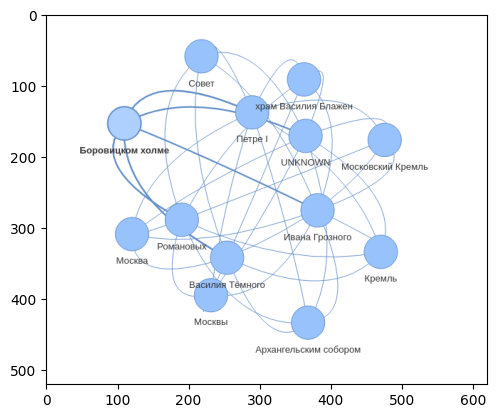

In [242]:
plt.imshow(Image.open('big_text.png'))

### Новостная статья

In [246]:
story = '''

Какие популярные чат-боты собирают данные о пользователях и передают их третьим лицам
3 мин
70
Блог компании BotHubИскусственный интеллектИнформационная безопасность*

На фоне растущей обеспокоенности по поводу китайских моделей ИИ, таких как DeepSeek, новое исследование показывает, что страхи могут быть преувеличены — по крайней мере, когда речь идёт о конфиденциальности данных. На самом деле, некоторые популярные американские чат-боты с искусственным интеллектом могут собирать ещё больше личной информации.

Когда DeepSeek в январе представила свою флагманскую модель ИИ с открытым исходным кодом, американская технологическая индустрия впала в истерику. Некоторые поддержали конкуренцию, заявив, что это «момент, когда ИИ стал спутником».Тем не менее около 12 миллионов пользователей по всему миру загрузили чат-бота с ИИ через два дня после его запуска. Вскоре возникли многочисленные проблемы с конфиденциальностью и безопасностью, что побудило частные и государственные организации запретить использование DeepSeek в США и за рубежом.

Но вот в чём загвоздка: несмотря на весь этот ажиотаж, DeepSeek не является самым большим нарушителем конфиденциальности. Недавние данные от Surfshark, известного VPN-провайдера, показали, что Google Gemini является приложением с искусственным интеллектом, потребляющим больше всего данных. 

Исследователи проанализировали сведения о конфиденциальности следующих чат-ботов, наиболее популярных в Apple App Store: ChatGPT, Gemini, Copilot, Perplexity, DeepSeek, Grok, Jasper, Poe, Claude и Pi. Затем они сравнили типы данных, которые собирает каждое приложение, а также то, собирает ли оно какие-либо данные, связанные с пользователями, и есть ли в приложении сторонние рекламодатели.

Проведенное расследование привело исследователей к выводу, что Google Gemini собирает значительно больше персональных данных: 22 из 35 типов пользовательских данных, включая высокочувствительные, такие как местоположение, пользовательский контент, список контактов устройства и историю посещенных страниц. В конечном счете, это намного превосходит данные, собранные другими популярными чат-ботами, включенными в исследование.

Только три компании — Gemini, Copilot и Perplexity — предоставляют точные сведения о местоположении пользователей. Однако около 30% чат-ботов передают третьим лицам, таким как брокеры данных, конфиденциальную информацию о пользователях, включая данные о местоположении и историю просмотров.

30% чат-ботов, упомянутых в статье, также собирают информацию о пользователях. В частности, Copilot, Poe и Jasper собирают данные о своих пользователях для использования в своих целях. Это означает, что информация, собранная в приложении, может быть связана с другими данными для персонализированной рекламы или анализа рекламных кампаний.

Кроме того, Copilot и Poe собирают идентификаторы устройств для этой цели, а Jasper собирает еще и данные о взаимодействии с продуктом, рекламные данные и «любые другие данные об активности пользователей в приложении», согласно экспертам Surfshark.

Спорная модель DeepSeek R1 занимает промежуточное положение, так что она не лучшая, но и не худшая. Она собирает в среднем 11 уникальных типов данных и преимущественно контактную информацию, пользовательский контент и диагностические данные.

Аналогичным образом, ChatGPT собирает 10 уникальных типов данных, включая контактную информацию, пользовательский контент, идентификаторы, данные об использовании и диагностику. Важно отметить, что ChatGPT также собирает историю чата, но пользователи могут вместо этого использовать «временный чат».

В то же время в политике конфиденциальности DeepSeek указано, что пользователи могут управлять историей своих чатов и удалять её в настройках.

Жалобы на нарушение конфиденциальности поступали в чат-бот DeepSeek по разным причинам, но в первую очередь они связаны с тем, что американская общественность подвергается повышенному риску слежки, кибервойн и других угроз национальной безопасности.

В политике конфиденциальности DeepSeek говорится: «Личная информация, которую мы собираем, может храниться на сервере, расположенном за пределами страны, в которой вы живёте. Мы храним собранную информацию на безопасных серверах, расположенных в Китайской Народной Республике».

'''

In [247]:
analis_text(story)
HTML(filename="ner_graph.html")

{'Bot': ['Hub', '', 'США', 'Grok', 'Poe', 'Pi'], 'китайски': [], 'DeepSeek': [], 'американски': ['американ'], 'Surf': [], 'shark': [], 'Google Gemini': ['Google Gemini'], 'Apple App Store': [], 'ChatGPT': [], 'Gemini': [], 'Copilot': [], 'Perplexity': [], 'Jasper': [], '': [], 'Claude': [], 'UNKNOWN': []}
ner_graph.html
[('DeepSeek_американски', 8), ('Bot_DeepSeek', 5), ('американски_', 4), ('американски_Google Gemini', 4), ('Bot_Bot', 2), ('Bot_ChatGPT', 2), ('Bot_Copilot', 2), ('Bot_Jasper', 2), ('Bot_', 2), ('китайски_', 2), ('китайски_Google Gemini', 2), ('DeepSeek_DeepSeek', 2), ('американски_Surf', 2), ('американски_shark', 2), ('американски_Apple App Store', 2), ('американски_ChatGPT', 2), ('американски_Gemini', 2), ('американски_Copilot', 2), ('американски_Perplexity', 2), ('американски_Jasper', 2), ('американски_Claude', 2), ('_shark', 2), ('Bot_Google Gemini', 2), ('shark_Google Gemini', 2), ('Bot_американски', 1), ('китайски_DeepSeek', 1), ('китайски_Surf', 1), ('китайски_sh

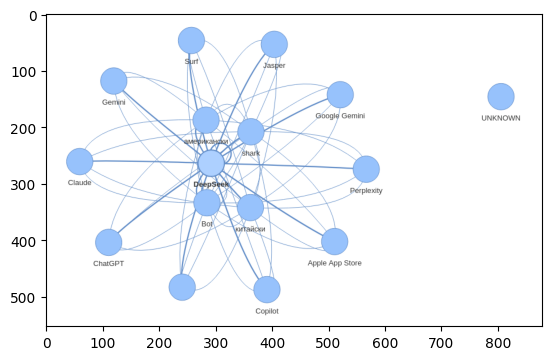

In [248]:
plt.imshow(Image.open('news_text.png'))

### Вывод

- С помощью NER можно извлекать имена сущностей, с помощью которых можно кластеризировать документы, которые связанны с конкретными лицами
- Можно автоматически отслеживать появляющуюся информаую об организации и за счет этого следить за отношением пользователей